# Linear Regression for house price prediction

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import loguniform
from scipy.stats import uniform

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


## Common Setup

In [2]:
np.random.seed(306)

In [3]:
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

## Data Loading and Splitting

In [4]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)

train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels,random_state=42)

## Linear Regression with normal equation

In [5]:
lin_reg_pipeline = Pipeline([("feature_scaling",StandardScaler()),("lin_reg",LinearRegression())])
lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)
lin_reg_train_error = -1*lin_reg_cv_results['train_score']
lin_reg_test_error = -1*lin_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n" 
      f"{lin_reg_train_error.mean():.3f} +/- {lin_reg_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n" 
      f"{lin_reg_test_error.mean():.3f} +/- {lin_reg_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.530 +/- 0.002
Mean absolute error of linear regression model on the test set:
0.527 +/- 0.008


=> underfitting

## Linear Regression with SGD

In [6]:
sgd_reg_pipeline = Pipeline([("feature_scaling",StandardScaler()),
                             ("sgd_reg",SGDRegressor(
                                 max_iter=np.ceil(1e6/com_train_features.shape[0]),
                                 early_stopping=True,
                                 eta0=1e-4,
                                 learning_rate='constant',
                                 tol=1e-5,
                                 validation_fraction=0.1,
                                 n_iter_no_change=5,
                                 average=10,
                                 random_state=42
                             ))])
sgd_reg_cv_results = cross_validate(sgd_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)
sgd_reg_train_error = -1*sgd_reg_cv_results['train_score']
sgd_reg_test_error = -1*sgd_reg_cv_results['test_score']

print(f"Mean absolute error of sgd regression model on the train set:\n" 
      f"{sgd_reg_train_error.mean():.3f} +/- {sgd_reg_train_error.std():.3f}")
print(f"Mean absolute error of sgd regression model on the test set:\n" 
      f"{sgd_reg_test_error.mean():.3f} +/- {sgd_reg_test_error.std():.3f}")

Mean absolute error of sgd regression model on the train set:
0.564 +/- 0.023
Mean absolute error of sgd regression model on the test set:
0.561 +/- 0.025


## Polynomial Regression

In [7]:
poly_reg_pipeline = Pipeline([("poly",PolynomialFeatures(degree=2)),("feature_scaling",StandardScaler()),
                             ("lin_reg",LinearRegression())])
poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)
poly_reg_train_error = -1*poly_reg_cv_results['train_score']
poly_reg_test_error = -1*poly_reg_cv_results['test_score']

print(f"Mean absolute error of sgd regression model on the train set:\n" 
      f"{poly_reg_train_error.mean():.3f} +/- {poly_reg_train_error.std():.3f}")
print(f"Mean absolute error of sgd regression model on the test set:\n" 
      f"{poly_reg_test_error.mean():.3f} +/- {poly_reg_test_error.std():.3f}")

Mean absolute error of sgd regression model on the train set:
0.461 +/- 0.003
Mean absolute error of sgd regression model on the test set:
0.485 +/- 0.030


These test set error is on dev_test set

In [8]:
poly_reg_pipeline = Pipeline([("poly",PolynomialFeatures(degree=2,interaction_only=True)),("feature_scaling",StandardScaler()),
                             ("lin_reg",LinearRegression())])
poly_reg_cv_results = cross_validate(poly_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)
poly_reg_train_error = -1*poly_reg_cv_results['train_score']
poly_reg_test_error = -1*poly_reg_cv_results['test_score']

print(f"Mean absolute error of sgd regression model on the train set:\n" 
      f"{poly_reg_train_error.mean():.3f} +/- {poly_reg_train_error.std():.3f}")
print(f"Mean absolute error of sgd regression model on the test set:\n" 
      f"{poly_reg_test_error.mean():.3f} +/- {poly_reg_test_error.std():.3f}")

Mean absolute error of sgd regression model on the train set:
0.478 +/- 0.003
Mean absolute error of sgd regression model on the test set:
0.497 +/- 0.024


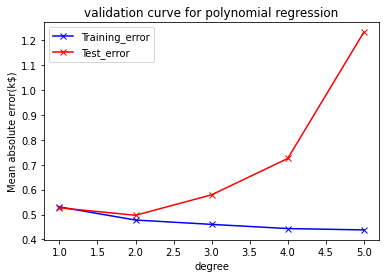

In [9]:
degree = [1,2,3,4,5]
train_scores, test_scores = validation_curve(poly_reg_pipeline,
                                             com_train_features,
                                             com_train_labels,
                                             param_name = "poly__degree",
                                             param_range=degree,cv=cv,
                                             scoring="neg_mean_absolute_error",
                                             n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores
plt.plot(degree,train_errors.mean(axis=1),'b-x',label="Training_error")
plt.plot(degree,test_errors.mean(axis=1),'r-x',label="Test_error")
plt.legend()

plt.xlabel("degree")
plt.ylabel("Mean absolute error(k$)")
_=plt.title("validation curve for polynomial regression")

## Ridge Regression

In [31]:
ridge_reg_pipeline = Pipeline([("poly",PolynomialFeatures(degree=2)),("feature_scaling",StandardScaler()),
                             ("ridge",Ridge(alpha=0.5))])
ridge_reg_cv_results = cross_validate(ridge_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)
ridge_reg_train_error = -1*ridge_reg_cv_results['train_score']
ridge_reg_test_error = -1*ridge_reg_cv_results['test_score']

print(f"Mean absolute error of sgd regression model on the train set:\n" 
      f"{ridge_reg_train_error.mean():.3f} +/- {ridge_reg_train_error.std():.3f}")
print(f"Mean absolute error of sgd regression model on the test set:\n" 
      f"{ridge_reg_test_error.mean():.3f} +/- {ridge_reg_test_error.std():.3f}")

Mean absolute error of sgd regression model on the train set:
0.481 +/- 0.003
Mean absolute error of sgd regression model on the test set:
0.487 +/- 0.006


## HPT for ridge regularization rate

In [11]:
alpha_list= np.logspace(-4,0,num=20)
ridge_reg_pipeline = Pipeline([("poly",PolynomialFeatures(degree=2)),("feature_scaling",StandardScaler()),
                             ("ridge_cv",RidgeCV(alphas=alpha_list,
                                                 cv=cv,
                                                 scoring="neg_mean_absolute_error"))])
ridge_reg_cv_results = ridge_reg_pipeline.fit(com_train_features, com_train_labels)


print(f"The score with best alpha is:\n" 
      f"{ridge_reg_cv_results[-1].best_score_:.3f}")
print(f"The error with best alpha is:\n" 
      f"{-ridge_reg_cv_results[-1].best_score_:.3f}")

The score with best alpha is:
-0.473
The error with best alpha is:
0.473


In [12]:
print("The best value for alpha: ", ridge_reg_cv_results[-1].alpha_)

The best value for alpha:  0.007847599703514606


### RidgeCv with cross validation

### Ridge HPT through GridSearchCV

In [13]:
ridge_grid_pipeline = Pipeline([("poly",PolynomialFeatures(degree=2)),("feature_scaling",StandardScaler()),
                             ("ridge",Ridge())])
param_grid = {'poly__degree': (1,2,3),
              'ridge__alpha': np.logspace(-4,0,num=20)}
ridge_grid_search = GridSearchCV(ridge_grid_pipeline,
                                 param_grid=param_grid,
                                    n_jobs=2,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True
                                    )
ridge_grid_search.fit(com_train_features, com_train_labels)


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [14]:
mean_train_error = -1*ridge_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
mean_test_error = -1*ridge_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_train_error = -1*ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
std_test_error = -1*ridge_grid_search.cv_results_['std_test_score'][ridge_grid_search.best_index_]

print(f"Best Mean absolute error of polynomial ridge regression model on the train set:\n" 
      f"{mean_train_error:.3f} +/- {std_train_error:.3f}")
print(f"Best Mean absolute error of polynomial ridge regression   model on the test set:\n" 
      f"{mean_test_error:.3f} +/- {std_test_error:.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.463 +/- -0.004
Best Mean absolute error of polynomial ridge regression   model on the test set:
0.474 +/- -0.015


In [15]:
print("Mean cross validated score of the best estimator is: ", ridge_grid_search.best_score_)
print("Mean cross validated error of the best estimator is: ", -ridge_grid_search.best_score_)

Mean cross validated score of the best estimator is:  -0.4738651176991914
Mean cross validated error of the best estimator is:  0.4738651176991914


This is same as `RidgeCV` that was carried earlier

In [16]:
print("The best parameter value is: ", ridge_grid_search.best_params_)

The best parameter value is:  {'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}


## Lasso Regression

### Baseline model with fixed learning rate

In [17]:
lasso_reg_pipeline = Pipeline([("poly",PolynomialFeatures(degree=2)),("feature_scaling",StandardScaler()),
                             ("lasso",Lasso(alpha=0.01))])
lasso_reg_cv_results = cross_validate(lasso_reg_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)
lasso_reg_train_error = -1*lasso_reg_cv_results['train_score']
lasso_reg_test_error = -1*lasso_reg_cv_results['test_score']

print(f"Mean absolute error of sgd regression model on the train set:\n" 
      f"{lasso_reg_train_error.mean():.3f} +/- {lasso_reg_train_error.std():.3f}")
print(f"Mean absolute error of sgd regression model on the test set:\n" 
      f"{lasso_reg_test_error.mean():.3f} +/- {lasso_reg_test_error.std():.3f}")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.986e+01, tolerance: 1.654e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.109e+01, tolerance: 1.669e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Mean absolute error of sgd regression model on the train set:
0.529 +/- 0.003
Mean absolute error of sgd regression model on the test set:
0.528 +/- 0.008


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.255e+01, tolerance: 1.658e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## HPT for lasso regularization rate

### With Cross validation

### With GridSearchCV

In [18]:
lasso_grid_pipeline = Pipeline([("poly",PolynomialFeatures(degree=2)),("feature_scaling",StandardScaler()),
                             ("lasso",Lasso())])
param_grid = {'poly__degree': (1,2,3),
              'lasso__alpha': np.logspace(-4,0,num=20)}
lasso_grid_search = GridSearchCV(lasso_grid_pipeline,
                                 param_grid=param_grid,
                                    n_jobs=2,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True
                                    )
lasso_grid_search.fit(com_train_features, com_train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.638e+03, tolerance: 2.066e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=2,
             param_grid={'lasso__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00]),
                         'poly__degree': (1, 2, 3)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [19]:
mean_train_error = -1*lasso_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
mean_test_error = -1*lasso_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_train_error = -1*lasso_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
std_test_error = -1*lasso_grid_search.cv_results_['std_test_score'][ridge_grid_search.best_index_]

print(f"Best Mean absolute error of polynomial ridge regression model on the train set:\n" 
      f"{mean_train_error:.3f} +/- {std_train_error:.3f}")
print(f"Best Mean absolute error of polynomial ridge regression   model on the test set:\n" 
      f"{mean_test_error:.3f} +/- {std_test_error:.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.515 +/- -0.003
Best Mean absolute error of polynomial ridge regression   model on the test set:
0.518 +/- -0.013


In [20]:
print("Mean cross validated score of the best estimator is: ", lasso_grid_search.best_score_)
print("Mean cross validated error of the best estimator is: ", -lasso_grid_search.best_score_)

Mean cross validated score of the best estimator is:  -0.48798304453391356
Mean cross validated error of the best estimator is:  0.48798304453391356


In [21]:
print("The best parameter value is: ", lasso_grid_search.best_params_)

The best parameter value is:  {'lasso__alpha': 0.0001, 'poly__degree': 3}


## SGD: Regularization and HPT

In [22]:
poly_sgd_pipeline = Pipeline([("poly",PolynomialFeatures(degree=2)),("feature_scaling",StandardScaler()),
                             ("sgd_reg",SGDRegressor(
                                 penalty='elasticnet',
                                 random_state=42))])
poly_sgd_cv_results = cross_validate(poly_sgd_pipeline,
                                    com_train_features,
                                    com_train_labels,
                                    cv=cv,
                                    scoring="neg_mean_absolute_error",
                                    return_train_score=True,
                                    return_estimator=True)
poly_sgd_train_error = -1*poly_sgd_cv_results['train_score']
poly_sgd_test_error = -1*poly_sgd_cv_results['test_score']

print(f"Mean absolute error of sgd regression model on the train set:\n" 
      f"{poly_sgd_train_error.mean():.3f} +/- {poly_sgd_train_error.std():.3f}")
print(f"Mean absolute error of sgd regression model on the test set:\n" 
      f"{poly_sgd_test_error.mean():.3f} +/- {poly_sgd_test_error.std():.3f}")

Mean absolute error of sgd regression model on the train set:
10824283052.546 +/- 4423288211.832
Mean absolute error of sgd regression model on the test set:
10946788540.250 +/- 5396536227.703


Search for best set of parameters for polynomial + SGD pipeline with `RandomizedSearchCV`

In [23]:
class uniform_int:
  """Integer valued version of the uniform distribution"""

  def __init__(self,a,b):
    self._distribution= uniform(a,b)

  def rvs(self,*args, **kwargs):
    """ Random variable sample"""
    return self._distribution.rvs(*args,**kwargs).astype(int)

In [24]:
param_distributions = {
    'poly__degree':[1,2,3],
    'sgd_reg__learning_rate':['constant','adaptive','invscaling'],
    'sgd_reg__l1_ratio':uniform(0,1),
    'sgd_reg__eta0':loguniform(1e-5,1),
    'sgd_reg__power_t':uniform(0,1)
}

poly_sgd_random_search = RandomizedSearchCV(
    poly_sgd_pipeline, param_distributions=param_distributions,
    n_iter=10,cv=cv,verbose=1,scoring='neg_mean_absolute_error'
)
poly_sgd_random_search.fit(com_train_features,com_train_labels)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('feature_scaling',
                                              StandardScaler()),
                                             ('sgd_reg',
                                              SGDRegressor(penalty='elasticnet',
                                                           random_state=42))]),
                   param_distributions={'poly__degree': [1, 2, 3],
                                        'sgd_reg__eta0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff0e6c5f850>,
                                        'sgd_reg__l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff0e6c5f1d0>,
                                        'sgd_reg__learning_rate': ['constant',
                                                                   'a

In [25]:
poly_sgd_random_search.best_score_

-0.5266188964337121

In [26]:
poly_sgd_random_search.best_params_

{'poly__degree': 1,
 'sgd_reg__eta0': 0.00017569928270100732,
 'sgd_reg__l1_ratio': 0.8686387810395121,
 'sgd_reg__learning_rate': 'adaptive',
 'sgd_reg__power_t': 0.6712948255943406}

## Comparison of weight vectors

In [27]:
feature_names = poly_reg_cv_results["estimator"][0][0].get_feature_names_out(
    input_features=train_features.columns
)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge AveRooms', 'HouseAge AveBedrms', 'HouseAge Population',
       'HouseAge AveOccup', 'HouseAge Latitude', 'HouseAge Longitude',
       'AveRooms AveBedrms', 'AveRooms Population', 'AveRooms AveOccup',
       'AveRooms Latitude', 'AveRooms Longitude', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup Latitude', 'AveOccup Longitude',
       'Latitude Longitude'], dtype=object)

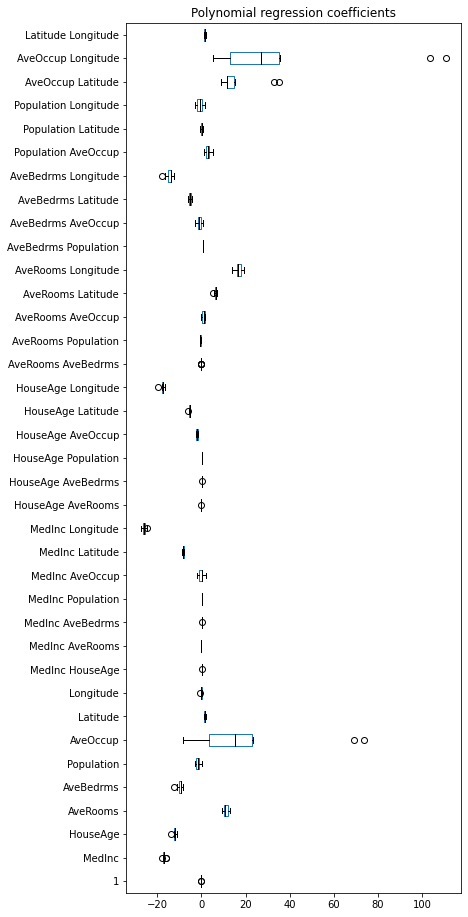

In [28]:
coefs = [est[-1].coef_ for est in poly_reg_cv_results["estimator"]]
weights_polynomial_regression = pd.DataFrame(coefs, columns=feature_names)

color = {"whiskers":"black","medians":"black","caps":"black"}
weights_polynomial_regression.plot.box(color=color,vert=False,figsize=(6,16))
_= plt.title("Polynomial regression coefficients")

In [32]:
feature_names = ridge_reg_cv_results["estimator"][0][0].get_feature_names_out(
    input_features=train_features.columns
)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

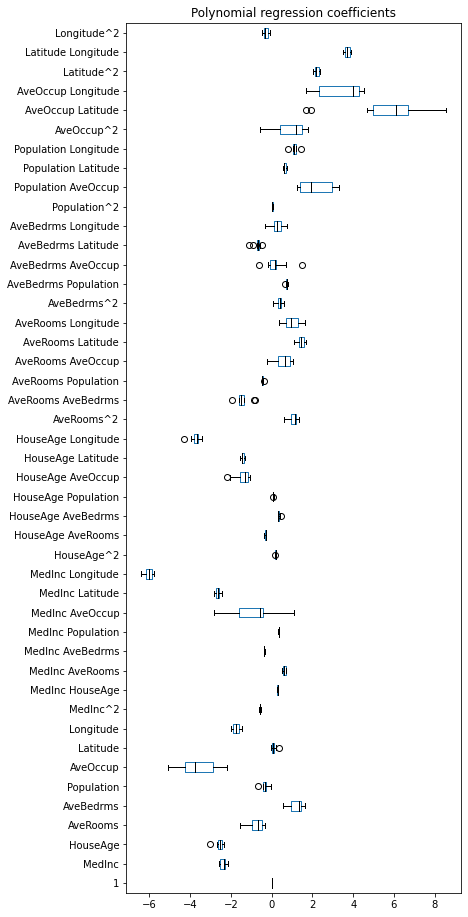

In [34]:
coefs = [est[-1].coef_ for est in ridge_reg_cv_results["estimator"]]
weights_ridge_regression = pd.DataFrame(coefs, columns=feature_names)

color = {"whiskers":"black","medians":"black","caps":"black"}
weights_ridge_regression.plot.box(color=color,vert=False,figsize=(6,16))
_= plt.title("Polynomial regression coefficients")

## Performance of the test set

### Baseline

In [35]:
baseline_model_median = DummyRegressor(strategy='median')
baseline_model_median.fit(train_features,train_labels)
mean_absolute_percentage_error(test_labels,baseline_model_median.predict(test_features))


0.5348927548151625

### Linear Regression with normal equation

In [36]:
mean_absolute_percentage_error(test_labels,lin_reg_cv_results['estimator'][0].predict(test_features))

0.32120472175482906

In [37]:
mean_absolute_percentage_error(test_labels,poly_sgd_random_search.best_estimator_.predict(test_features))

0.31916692241957345

### Polynomial regression

In [38]:
poly_reg_pipeline.fit(com_train_features,com_train_labels)
mean_absolute_percentage_error(test_labels,poly_reg_pipeline.predict(test_features))

0.28199759082657244

### Ridge regression

In [39]:
mean_absolute_percentage_error(test_labels,ridge_grid_search.best_estimator_.predict(test_features))

0.27110336451421413

### Lasso Regression

In [40]:
mean_absolute_percentage_error(test_labels,lasso_grid_search.best_estimator_.predict(test_features))

0.28074969263810107